In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from farmdataset import FarmDataset
import time
from PIL import Image
from torch.autograd import Variable
import numpy as np
import glob
import cv2

In [2]:
label1, label2, label3, label4 = [], [], [], []
imgname = glob.glob('./data/train/data1024/*.png')
labelname = glob.glob('./data/train/label1024/*.png')
for i in range(len(imgname)):
    img = cv2.imread(imgname[i])
    label = cv2.imread(labelname[i], cv2.IMREAD_GRAYSCALE)
    for j in range(img.shape[0]):
        for k in range(img.shape[1]):
            if np.all(img[j][k] == 0):
                continue

            if label[j][k] == 1 and len(label1) < 10e5:
                label1.append(img[j][k])
            elif label[j][k] == 2 and len(label2) < 10e5:
                label2.append(img[j][k])
            elif label[j][k] == 3 and len(label3) < 10e5:
                label3.append(img[j][k])
            elif label[j][k] == 4 and len(label4) < 10e5:
                label4.append(img[j][k])
                
        if len(label1) == 10e5 and len(label2) == 10e5 and len(label3) == 10e5 and len(label4) == 10e5:
            break

In [3]:
B1, G1, R1 = [], [], []
for l in label1:
    B1.append(l[0])
    G1.append(l[1])
    R1.append(l[2])
    
B2, G2, R2 = [], [], []
for l in label2:
    B2.append(l[0])
    G2.append(l[1])
    R2.append(l[2])
    
B3, G3, R3 = [], [], []
for l in label3:
    B3.append(l[0])
    G3.append(l[1])
    R3.append(l[2])
    
B4, G4, R4 = [], [], []
for l in label4:
    B4.append(l[0])
    G4.append(l[1])
    R4.append(l[2])

(array([   70.,   230.,   432.,   837.,  1681.,  2145.,  2725.,  3124.,
         3785.,  3586.,  4167.,  4971.,  6574.,  8510.,  9228., 10440.,
        13966., 12856., 13992., 14652., 15758., 17526., 19183., 21793.,
        28265., 35723., 38288., 37889., 36843., 31864., 26160., 21347.,
        20926., 28004., 28790., 32304., 31967., 22446., 19103., 18747.,
        18031., 16858., 17808., 22677., 31145., 44414., 53252., 52238.,
        38275., 54405.]),
 array([  2.  ,   7.06,  12.12,  17.18,  22.24,  27.3 ,  32.36,  37.42,
         42.48,  47.54,  52.6 ,  57.66,  62.72,  67.78,  72.84,  77.9 ,
         82.96,  88.02,  93.08,  98.14, 103.2 , 108.26, 113.32, 118.38,
        123.44, 128.5 , 133.56, 138.62, 143.68, 148.74, 153.8 , 158.86,
        163.92, 168.98, 174.04, 179.1 , 184.16, 189.22, 194.28, 199.34,
        204.4 , 209.46, 214.52, 219.58, 224.64, 229.7 , 234.76, 239.82,
        244.88, 249.94, 255.  ]),
 <a list of 1 Patch objects>)

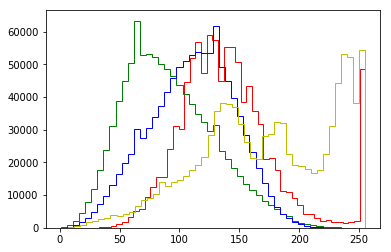

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(R1, bins = 50, color = 'r', histtype = 'step', stacked =True)
plt.hist(R2, bins = 50, color = 'g', histtype = 'step', stacked =True)
plt.hist(R3, bins = 50, color = 'b', histtype = 'step', stacked =True)
plt.hist(R4, bins = 50, color = 'y', histtype = 'step', stacked =True)